# Movie Recommendation System


### Objective
The objective of this project is to build a recommendation system that suggests movies to users based on their preferences and movie ratings. This project utilizes collaborative filtering to make personalized recommendations.


### Data Source
We’ll use the MovieLens dataset, which is commonly used for recommendation systems. You can download it from [MovieLens Dataset](https://grouplens.org/datasets/movielens/).


### Import Library


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns


### Import Data


In [2]:
# Load the dataset (download and upload 'movies.csv' and 'ratings.csv' from MovieLens)
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Display the first few rows of each dataset
print("Movies Data:")
movies.head()

print("\nRatings Data:")
ratings.head()


Movies Data:

Ratings Data:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Describe Data


In [3]:
# Check data information and summary statistics
print("Movies Data Information:")
movies.info()

print("\nRatings Data Information:")
ratings.info()

print("\nMovies Data Description:")
print(movies.describe())

print("\nRatings Data Description:")
print(ratings.describe())


Movies Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Ratings Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Movies Data Description:
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max  

### Data Visualization


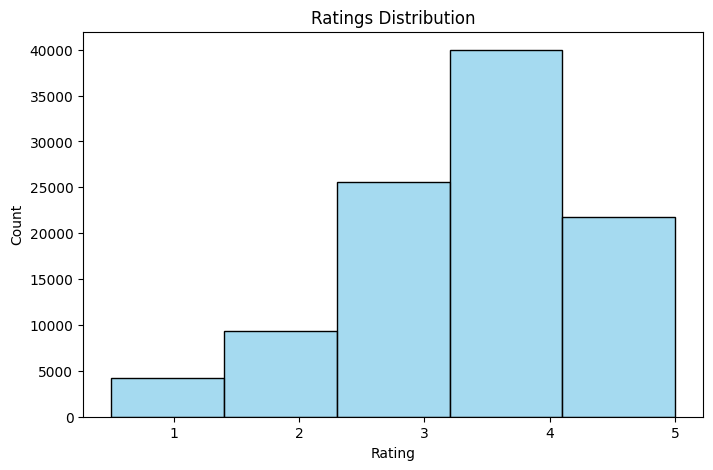

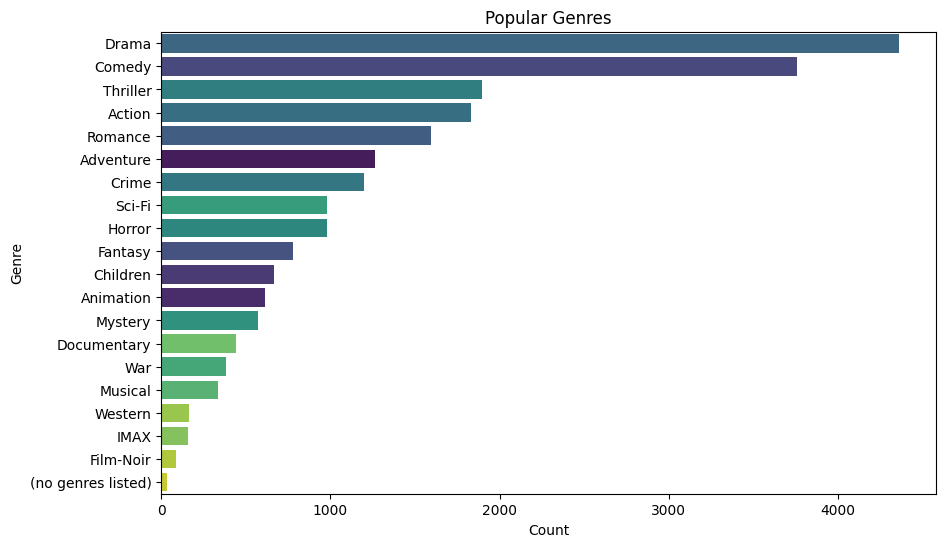

In [4]:
# Distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], kde=False, bins=5, color='skyblue')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Most popular genres
movies['genres'] = movies['genres'].str.split('|')
all_genres = sum(movies['genres'], [])
plt.figure(figsize=(10, 6))
sns.countplot(y=all_genres, hue=all_genres, order=pd.Series(all_genres).value_counts().index, palette='viridis', legend=False)
plt.title('Popular Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


### Data Preprocessing


In [5]:
# Merge the movies and ratings datasets on the movieId column
movie_data = pd.merge(ratings, movies, on='movieId')

# Create a pivot table with users as rows, movies as columns, and ratings as values
user_movie_matrix = movie_data.pivot_table(index='userId', columns='title', values='rating')

# Fill NaN values with 0 (or any preferred method)
user_movie_matrix = user_movie_matrix.fillna(0)

user_movie_matrix.head()


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Define Recommendation Function


In [6]:
# Calculate similarity matrix using cosine similarity
movie_similarity = cosine_similarity(user_movie_matrix.T)
movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)

# Recommendation function
def recommend_movies(movie_title, num_recommendations=5):
    if movie_title not in movie_similarity_df:
        return "Movie not found in dataset."
    similar_scores = movie_similarity_df[movie_title]
    similar_movies = similar_scores.sort_values(ascending=False)[1:num_recommendations+1]
    return similar_movies


### Test the Recommendation Function


In [7]:
# Test the recommendation function
movie_to_recommend = 'Toy Story (1995)'  # Replace with any movie title from the dataset
recommendations = recommend_movies(movie_to_recommend, num_recommendations=5)
print(f"Movies recommended based on '{movie_to_recommend}':")
print(recommendations)


Movies recommended based on 'Toy Story (1995)':
title
Toy Story 2 (1999)                           0.572601
Jurassic Park (1993)                         0.565637
Independence Day (a.k.a. ID4) (1996)         0.564262
Star Wars: Episode IV - A New Hope (1977)    0.557388
Forrest Gump (1994)                          0.547096
Name: Toy Story (1995), dtype: float64


### Explanation
The recommendation system uses collaborative filtering based on user ratings. By calculating the similarity between movies, we can suggest similar movies to users based on their preferences. The recommendation function lists the top similar movies based on cosine similarity.
